In [1]:
from pymongo import MongoClient, ASCENDING
import numpy as np
import pandas as pd

6453
162263125165035.0
time.struct_time(tm_year=2021, tm_mon=6, tm_mday=2, tm_hour=10, tm_min=54, tm_sec=11, tm_wday=2, tm_yday=153, tm_isdst=0)


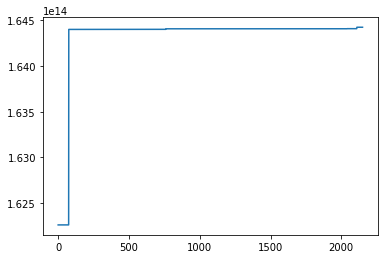

In [2]:
with MongoClient("127.0.0.1", port=27017) as client:
    db = client.InFusion
    df = pd.DataFrame(list(db.HOURS.find().sort([("_id", ASCENDING)])))
    print(df.size)
    temp = df["_id"][0]
    df["_id"].sort_index().plot()
    print(temp)
    import time
    print(time.gmtime(temp/100000.))

<AxesSubplot:>

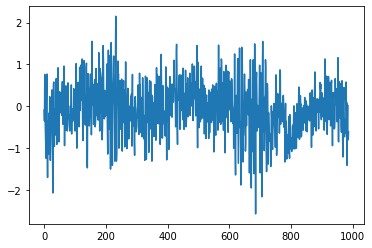

In [7]:
from InFusionTools import convertTime
import pandas as pd
from mongoTools import connectMongoDB

db = connectMongoDB(True)

t0 = convertTime("Recorder_2021_08_02_08_14_23")
t1 = convertTime("Recorder_2021_06_04_08_30_43")
message = "OMGS"
signal = "OmgS_Y"

df = pd.DataFrame(list(db[message].find({"_id": {"$lt": t1*100000}}).sort([("_id", ASCENDING)])))
df[signal].plot()
#df[message].head()

In [ ]:
message = "CCVS1"
df = pd.DataFrame(list(db[message].find().sort([("_id", ASCENDING)])))
df["_id"].plot()